<a href="https://colab.research.google.com/github/keishacllsta/analisis_sentimen/blob/main/SentimentWallet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
df = pd.read_csv("/content/wallet.csv")
print(df.shape)
df = df.head(200)
print(df.shape)

(967, 8)
(200, 8)


In [ ]:
df.head()

,no,Submission date,Review Language,Author,Rating,Review,Semantic Sentiment,Developer Reply
0,1.0,2025-01-13T23:19:56+00:00,en,Alberto Chocolate,5,Amazing App for those who understand the importance of managing your financial life!!,NaN,"Hello, Thank you for using Wallet. We appreciate your feedback and we’ll do our best to always meet your expectations. Have a great day."
1,2.0,2025-01-13T19:48:23+00:00,en,Miriam Martey,4,It is a great App. I think we should be given the option to edit and create our own Categories. That would be very helpful.,Positive,"Hello, the reason for which new categories cannot be added is that Wallet uses machine learning that works with structured data. However, you can rename the main categories or add your own subcategory please see here: https://bit.ly/3IGl8sc. We also recommend using labels, which are helpful in working with transactions. Thank you for your review."
2,3.0,2025-01-13T14:23:01+00:00,en,apri naldi,5,"So far so good, maybe in the future there could be an update for the calendar view feature, it would be more interesting to see recurring payments",Mixed,"Hello, Some features are missing, but our developers are actively working on features which will give the users more control over their individual settings. Please share your ideas with us here: https://feedback.budgetbakers.com/. This way your suggestions reach our developers directly and will be considered for future updates."
3,4.0,2025-01-13T12:43:29+00:00,en,SHORAODDI HOSSAIN,5,Great,Positive,NaN
4,5.0,2025-01-13T10:10:50+00:00,en,Bryan Theodore Rivera,5,Helps me keep track.,Positive,NaN


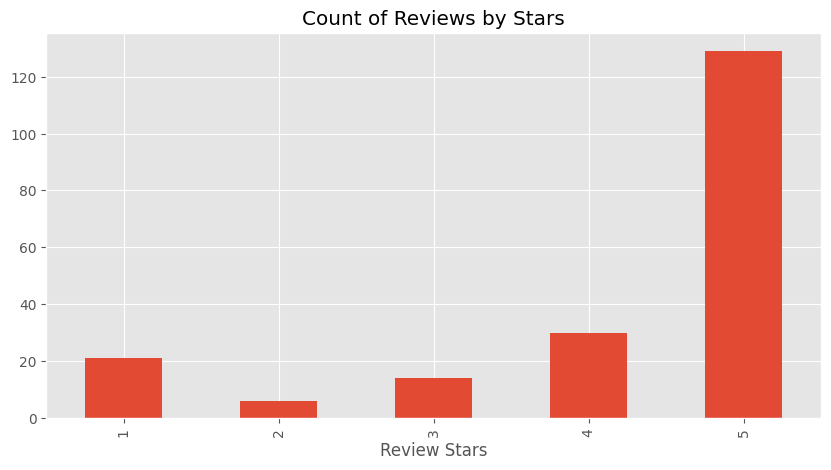

In [ ]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
example = df['Review'][50]
print(example)

Hi I'm from Sri Lanka. This is great app. But I can't add my bank to it. Please add sri lankan banks this app.


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('i hate this app.')

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.6705}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['no']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'no'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,no,neg,neu,pos,compound,Submission date,Review Language,Author,Rating,Review,Semantic Sentiment,Developer Reply
0,1.0,0.0,0.615,0.385,0.7835,2025-01-13T23:19:56+00:00,en,Alberto Chocolate,5,Amazing App for those who understand the importance of managing your financial life!!,NaN,"Hello, Thank you for using Wallet. We appreciate your feedback and we’ll do our best to always meet your expectations. Have a great day."
1,2.0,0.0,0.683,0.317,0.8516,2025-01-13T19:48:23+00:00,en,Miriam Martey,4,It is a great App. I think we should be given the option to edit and create our own Categories. That would be very helpful.,Positive,"Hello, the reason for which new categories cannot be added is that Wallet uses machine learning that works with structured data. However, you can rename the main categories or add your own subcategory please see here: https://bit.ly/3IGl8sc. We also recommend using labels, which are helpful in working with transactions. Thank you for your review."
2,3.0,0.0,0.780,0.220,0.7943,2025-01-13T14:23:01+00:00,en,apri naldi,5,"So far so good, maybe in the future there could be an update for the calendar view feature, it would be more interesting to see recurring payments",Mixed,"Hello, Some features are missing, but our developers are actively working on features which will give the users more control over their individual settings. Please share your ideas with us here: https://feedback.budgetbakers.com/. This way your suggestions reach our developers directly and will be considered for future updates."
3,4.0,0.0,0.000,1.000,0.6249,2025-01-13T12:43:29+00:00,en,SHORAODDI HOSSAIN,5,Great,Positive,NaN
4,5.0,0.0,0.536,0.464,0.3818,2025-01-13T10:10:50+00:00,en,Bryan Theodore Rivera,5,Helps me keep track.,Positive,NaN


In [ ]:

df = pd.DataFrame(vaders)
pd.set_option('display.max_colwidth', None)

positive_reviews = df[df["pos"] > df["neu"]]

output = positive_reviews[["Review"]].head(5)

print("pos ")
print(output)


pos 
                             Review
3                             Great
5   one of the best app of its kind
11                             good
12                         Nice app
13                  Best app for me


In [ ]:

df = pd.DataFrame(vaders)
pd.set_option('display.max_colwidth', None)

positive_reviews = df[df["pos"] < df["neu"]]

output = positive_reviews[["Review"]].head(5)

print("neu ")
print(output)


neu 
                                                                                                                                               Review
0                                                               Amazing App for those who understand the importance of managing your financial life!!
1                         It is a great App. I think we should be given the option to edit and create our own Categories. That would be very helpful.
2  So far so good, maybe in the future there could be an update for the calendar view feature, it would be more interesting to see recurring payments
4                                                                                                                                Helps me keep track.
6                                                               Reliable and includes all the features that I need currently (even the free version).


## 2


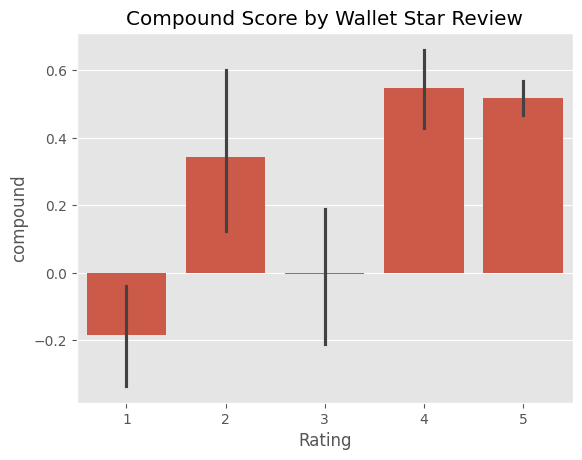

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=vaders, x='Rating', y='compound')
#compound : ovrall sentiment (?)
ax.set_title('Compound Score by Wallet Star Review')
plt.show()


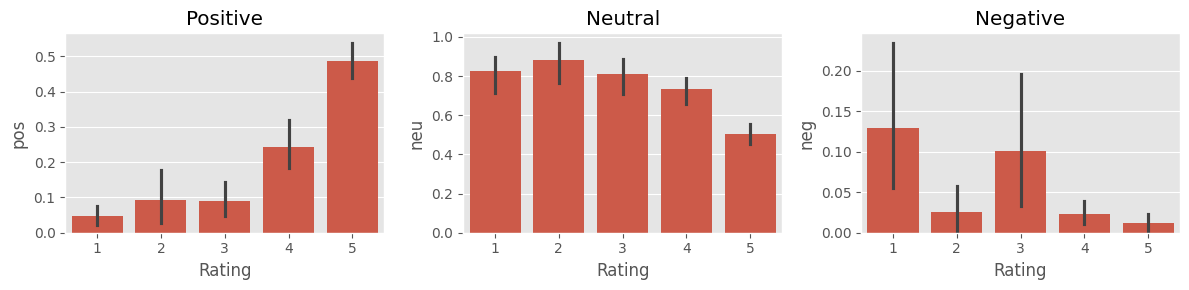

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


## 3 **Roberta** **model**

#biasany g bs ngedetect sarkas, tp pake ini mungkin sabi

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
print(example)
sia.polarity_scores(example)


Hi I'm from Sri Lanka. This is great app. But I can't add my bank to it. Please add sri lankan banks this app.


{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.6705}

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.14804904, 'roberta_neu': 0.3713776, 'roberta_pos': 0.48057336}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['no']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'no'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

Index(['no', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'neg', 'neu', 'pos',
       'compound', 'Submission date', 'Review Language', 'Author', 'Rating',
       'Review', 'Semantic Sentiment', 'Developer Reply'],
      dtype='object')

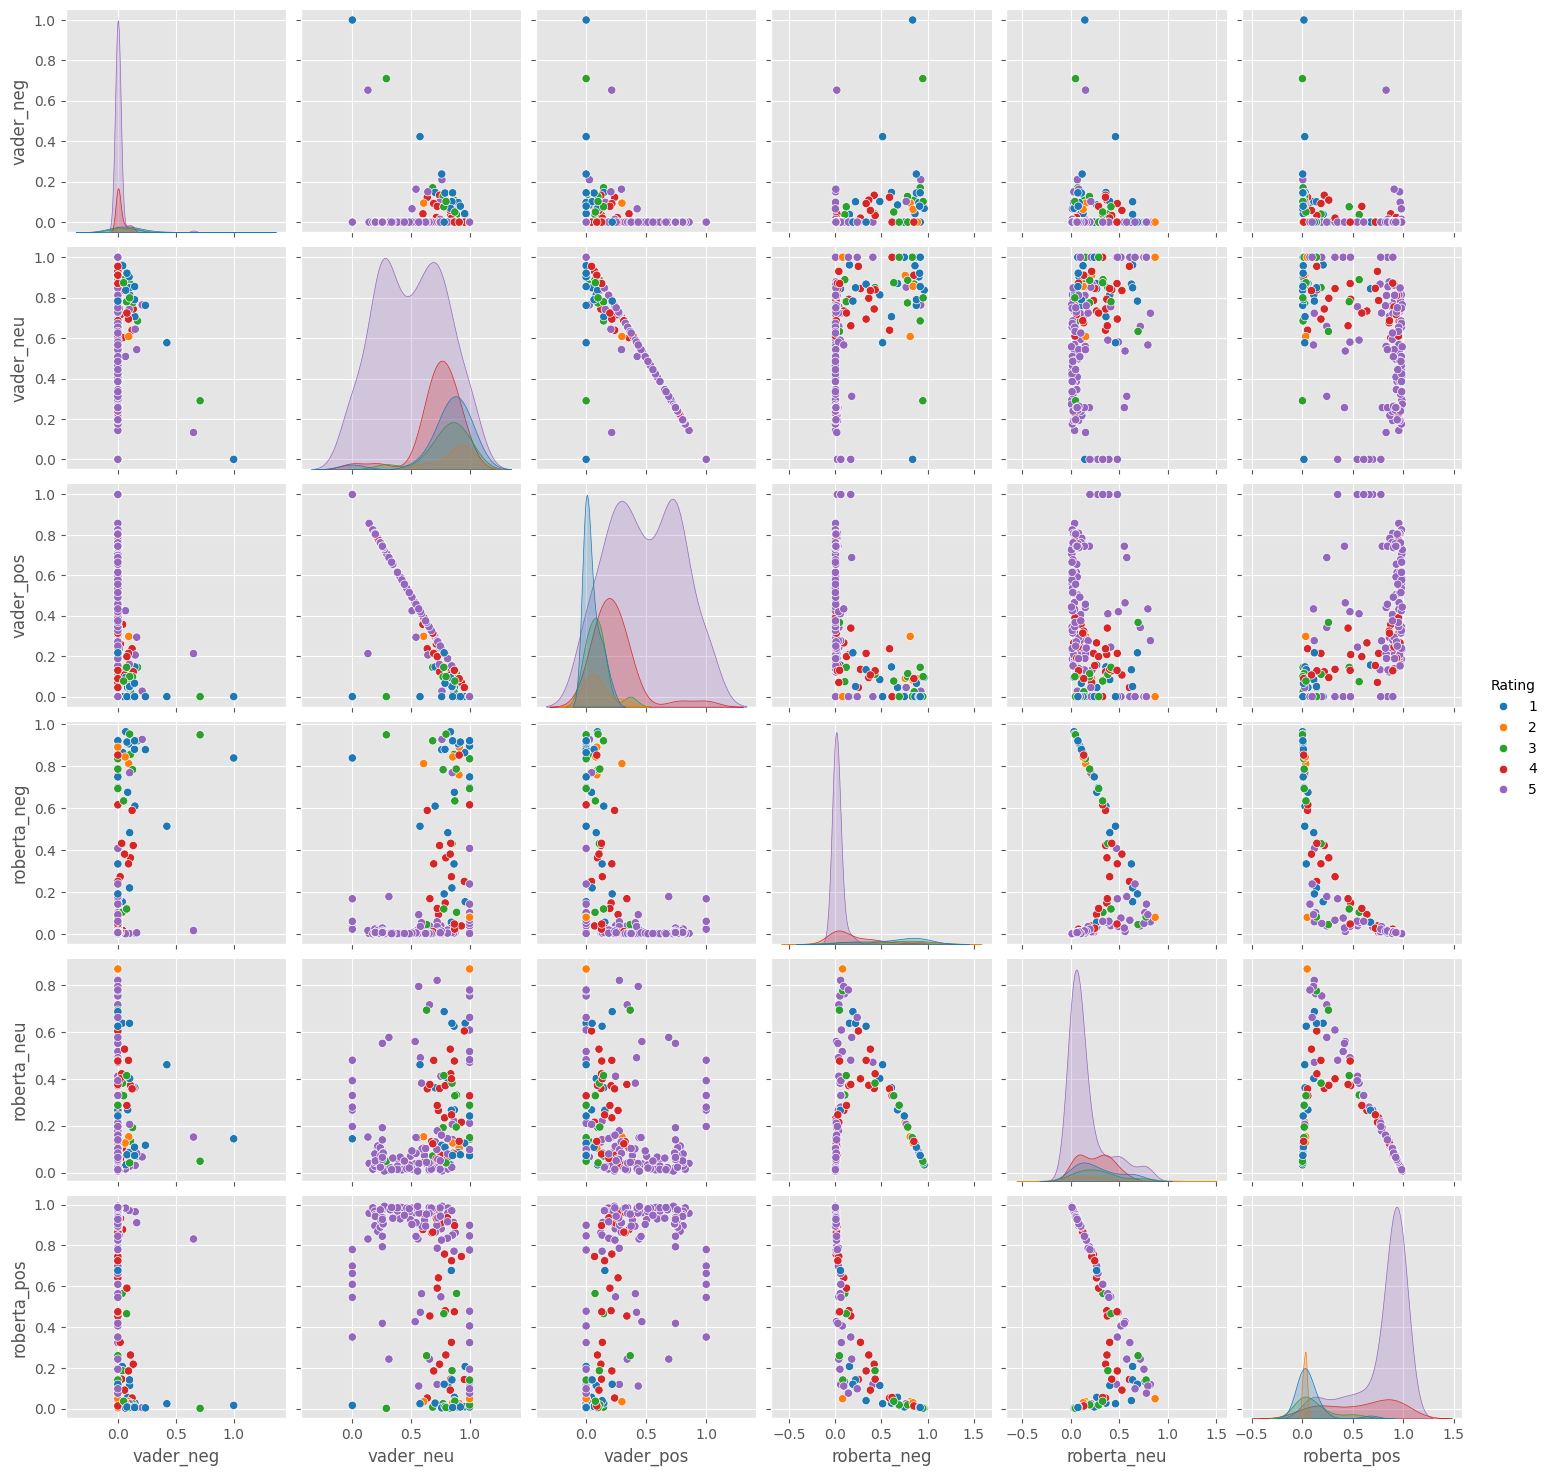

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()


In [ ]:
results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]

"It would be perfect to replace the app that I'm currently using if you could fully customize the categories and subcategories"

In [ ]:
results_df.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]

'Nevers managed to conect with any bank... Would like a refund'

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
sent_pipeline('useless!')

[{'label': 'NEGATIVE', 'score': 0.9997988343238831}]

In [ ]:
print("Contoh Sentimen Positif:")
for i, review in enumerate(review, 1):
    # Analisis sentimen
    scores = sia.polarity_scores(text)

    # Memfilter sentimen positif
    if scores['pos'] > scores['neg']:
        print(f"Teks {i}: {text} (Skor Positif: {scores['pos']:.2f})")

Contoh Sentimen Positif:


NameError: name 'review' is not defined

In [ ]:
example = df['Review'][51]
print(example)
sent_pipeline(example)